### Question 1

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Create a CSV file with sample data.

In [66]:
data = {
    'Temp': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

df = pd.DataFrame(data)

csv_file = 'yield_data.csv'
df.to_csv(csv_file, index=False)

In [67]:
X=df['Temp'].to_numpy()
Y=df['Yield'].to_numpy()

### Pedhazur Linear Method

In [68]:
b1_pedahzur=np.sum((X-X.mean())*(Y-Y.mean()))/np.sum((X-X.mean())**2)
b0_pedahzur=Y.mean()-(b1_pedahzur*X.mean())

y_pedahzur = b0_pedahzur + b1_pedahzur * X
squared_errors = (Y - y_pedahzur) ** 2
mse_pedahzur = np.mean(squared_errors)
rmse_pedahzur = np.sqrt(np.mean(squared_errors))

print(f"Equation : {b1_pedahzur}x + {b0_pedahzur}")
print(f"Predicted y : {y_pedahzur}")
print(f"MSE : {mse_pedahzur}")
print(f"RMSE : {rmse_pedahzur}")

Equation : 0.006756756756756758x + 2.306306306306306
Predicted y : [2.64414414 2.64414414 2.64414414 2.77927928 2.77927928 2.77927928
 2.84684685 2.84684685 2.84684685 2.91441441 2.91441441 2.91441441
 2.98198198 2.98198198 2.98198198]
MSE : 0.13270870870870877
RMSE : 0.36429206511905904


### Matrix Linear Method

In [69]:
mat1=np.array([[len(X),np.sum(X)],
               [np.sum(X),np.sum(X**2)]])
mat2=np.array([[np.sum(Y),
                np.sum(X*Y)]])
coeffs=np.dot(np.linalg.inv(mat1),mat2.T)
b0_mat,b1_mat=coeffs[0,0],coeffs[1,0]

y_mat1 = b0_mat + b1_mat * X
squared_errors = (Y - y_mat1) ** 2
mse_mat1 = np.mean(squared_errors)
rmse_mat1 = np.sqrt(np.mean(squared_errors))

print(f"Equation : {b1_mat}x + {b0_mat}")
print(f"Predicted y : {y_mat1}")
print(f"MSE : {mse_mat1}")
print(f"RMSE : {rmse_mat1}")

Equation : 0.00675675675675691x + 2.306306306306297
Predicted y : [2.64414414 2.64414414 2.64414414 2.77927928 2.77927928 2.77927928
 2.84684685 2.84684685 2.84684685 2.91441441 2.91441441 2.91441441
 2.98198198 2.98198198 2.98198198]
MSE : 0.1327087087087086
RMSE : 0.3642920651190588


### Matrix Polynomial Method

In [70]:
mat1=np.array([[len(X),np.sum(X),np.sum(X**2)],
               [np.sum(X),np.sum(X**2),np.sum(X**3)],
               [np.sum(X**2),np.sum(X**3),np.sum(X**4)]])
mat2=np.array([[np.sum(Y),
                np.sum(X*Y),
                np.sum((X**2)*Y)]])
coeffs=np.dot(np.linalg.inv(mat1),mat2.T)
b0_mat,b1_mat,b2_mat=coeffs[0,0],coeffs[1,0],coeffs[2,0]

y_mat2 = b0_mat + b1_mat * X + b2_mat * (X**2)
squared_errors = (Y - y_mat2) ** 2
mse_mat2 = np.mean(squared_errors)
rmse_mat2 = np.sqrt(np.mean(squared_errors))

print(f"Equation : {b2_mat}x^2 + {b1_mat}x + {b0_mat}")
print(f"Predicted y : {y_mat2}")
print(f"MSE : {mse_mat2}")
print(f"RMSE : {rmse_mat2}")

Equation : 0.0010756013745701898x^2 + -0.15371134020614363x + 7.960481099654089
Predicted y : [2.96391753 2.96391753 2.96391753 2.47113402 2.47113402 2.47113402
 2.54742268 2.54742268 2.54742268 2.83883162 2.83883162 2.83883162
 3.34536082 3.34536082 3.34536082]
MSE : 0.04778465063001146
RMSE : 0.21859700508015076


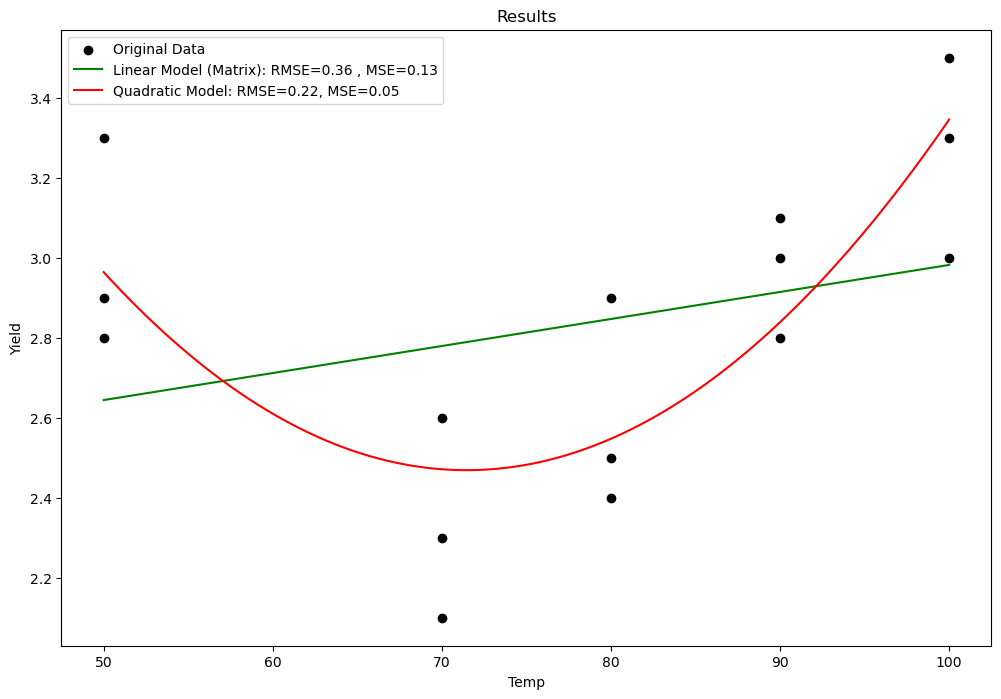

In [71]:
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, color='black', label='Original Data')
plt.plot(X, y_mat1, color='green', label=f'Linear Model (Matrix): RMSE={rmse_mat1:.2f} , MSE={mse_mat1:.2f}')
X_range = np.linspace(min(X), max(X), 100)
y_range = b0_mat + b1_mat * X_range + b2_mat * (X_range ** 2)
plt.plot(X_range, y_range, color='red', label=f'Quadratic Model: RMSE={rmse_mat2:.2f}, MSE={mse_mat2:.2f}')

plt.xlabel('Temp')
plt.ylabel('Yield')
plt.title('Results')
plt.legend()
plt.show()

### Question 2

In [73]:
data = {
    'Infarc': [0.119, 0.19, 0.395, 0.469, 0.13, 0.311, 0.418, 0.48, 0.687, 0.847,
               0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22, 0.299, 0.35, 0.35,
               0.588, 0.379, 0.149, 0.316, 0.39, 0.429, 0.477, 0.439, 0.446, 0.538,
               0.625, 0.974],
    'Area': [0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06, 1.2, 1.47,
             0.44, 0.77, 0.9, 1.07, 1.01, 1.03, 1.16, 1.21, 1.2, 1.22,
             0.99, 0.77, 1.05, 1.06, 1.02, 0.99, 0.97, 1.12, 1.23, 1.19,
             1.22, 1.4],
    'Group': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
              2,2],
    'X2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0,0],
    'X3': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1,1]
}

df = pd.DataFrame(data)
csv_filename = 'rabbit.csv'
df.to_csv(csv_filename, index=False)